In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
movies=pd.read_csv("fandango_score_comparison.csv")
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


The best place to look for a movie rating is to see whose ratings are distributed in a pattern which resembles the most, or is identical to, the pattern of a normal distribution, which is this: given a set of values lying in a certain interval, most of them are in the middle of it, and the few others at that interval’s extremes.

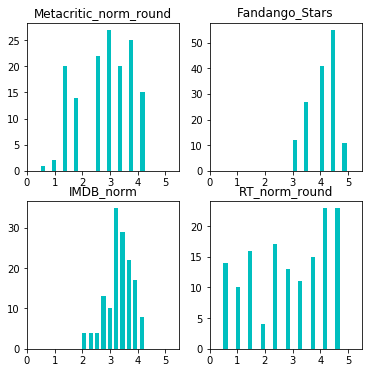

In [74]:
fig,ax=plt.subplots(2,2,figsize=(6,6))
ax=ax.flatten()
for ind,rating in enumerate(["Metacritic_norm_round","Fandango_Stars","IMDB_norm","RT_norm_round"]):
    ax[ind].hist(movies[rating],width=0.15,color="c")
    ax[ind].set_xlim(0,5.5)
    ax[ind].set_xticks(range(0,6))
    ax[ind].set_title(rating)
plt.show()

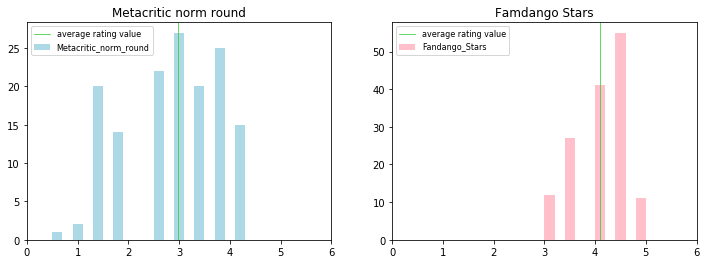

In [100]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
ax[0].hist(movies.Metacritic_norm_round,bins=10,color="lightblue",width=0.2)
ax[0].axvline(np.mean(movies.Metacritic_norm_round),color="limegreen",linewidth=0.75,label="average rating value")
ax[0].set_title("Metacritic norm round")
ax[1].hist(movies["Fandango_Stars"],color="pink",bins=10,width=0.2)
ax[1].axvline(np.mean(movies.Fandango_Stars),color="limegreen",linewidth=0.75,label="average rating value")
ax[1].set_title("Famdango Stars")
ax[0].set_xlim(0,6)
ax[1].set_xlim(0,6)
ax[0].legend(loc=2,prop={'size': 8})
ax[1].legend(loc=2,prop={'size': 8})
plt.show()

Metacritic ratings vary more than Fandango Ones.

In [8]:

Meta_mean=movies["Metacritic_norm_round"].mean()
Meta_median=np.median(movies["Metacritic_norm_round"])
Meta_std=np.std(movies["Metacritic_norm_round"])

Fand_mean=movies["Fandango_Stars"].mean()
Fand_median=np.median(movies["Fandango_Stars"])
Fand_std=np.std(movies["Fandango_Stars"])

for i in ["Metacritic_norm_round","Fandango_Stars"]:
    print(i)
    print("Mean: ",np.mean(movies[i]))
    print("Median: ",np.median(movies[i]))
    print("Std: ",np.std(movies[i]))

Metacritic_norm_round
('Mean: ', 2.9726027397260273)
('Median: ', 3.0)
('Std: ', 0.9875610297038636)
Fandango_Stars
('Mean: ', 4.089041095890411)
('Median: ', 4.0)
('Std: ', 0.5385321612699531)


### Metacritic uses a 0 to 5 scale for the ratings while Fandango uses a 3 to 5 scale
Ratings should be normalized first

(0, 5.5)

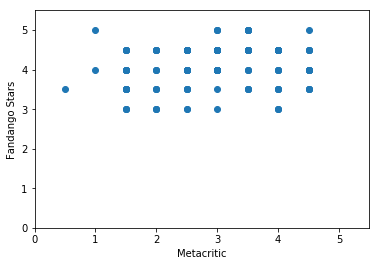

In [9]:
plt.scatter(movies.Metacritic_norm_round,movies.Fandango_Stars)
plt.ylabel("Fandango Stars")
plt.xlabel("Metacritic")
plt.ylim(0,5.5)
plt.xlim(0,5.5)

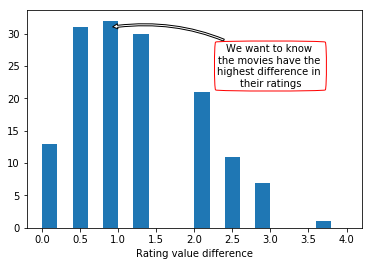

In [56]:
movies["fm_diff"]=np.abs(movies["Metacritic_norm_round"]-movies["Fandango_Stars"])
fm_diff=np.abs(movies["fm_diff"])
plt.hist(fm_diff,width=0.2)
plt.xlabel("Rating value difference")
ann = plt.annotate("We want to know \nthe movies have the \nhighest difference in \ntheir ratings",
                  xy=(0.9, 31), xycoords='data',
                  xytext=(3, 25), textcoords='data',
                  size=10, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w",ec="r", lw=1),
                  arrowprops=dict(arrowstyle="simple",
                                  connectionstyle="arc3,rad=0.2",
                                  fc="w"), 
                  )

In [32]:
sorted_movies=movies.sort_values(by=["fm_diff"],ascending=False)
print("Biggest_difference between Fandango and Metacritic:")
print(sorted_movies.head(5)[["FILM","fm_diff"]])

Biggest_difference between Fandango and Metacritic:
                        FILM  fm_diff
3     Do You Believe? (2015)      4.0
85         Little Boy (2015)      3.0
47              Annie (2014)      3.0
19             Pixels (2015)      3.0
134  The Longest Ride (2015)      3.0


##### In order to know the correlation between the two datasets, we will use Pearson's correlation equation:
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/f76ccfa7c2ed7f5b085115086107bbe25d329cec "Pearsons correlation formula")
Where:
- $cov$ is the covariance
- $ \sigma_X $ is the standard deviation of $X$ and $\sigma_Y$ is the standard deviation of $Y$.


In [58]:
from scipy.stats import pearsonr
r_value,p_value=pearsonr(movies["Metacritic_norm_round"],movies["Fandango_Stars"])
print "Pearson coefficient: ",r_value
print "Significance: ",p_value

Pearson coefficient:  0.178449190739
Significance:  0.0311615162285


### Running a Linear Regression

In [59]:
from scipy.stats import linregress
slope,intercept,r_value,p_value,stderr=linregress(movies["Metacritic_norm_round"],movies["Fandango_Stars"])
print "slope: ",slope
print "intercept: ",intercept
print "r value: ", r_value
print "p value: ",p_value
print "standard error: ", stderr

slope:  0.0973110779739
intercept:  3.7997739189
r value:  0.178449190739
p value:  0.0311615162285
standard error:  0.0447135446568


How many Fandango Stars would get a movie that has a 3 star rating in Metacritic?

In [60]:
pred_3=3*slope+intercept
print(pred_3)

4.09170715282


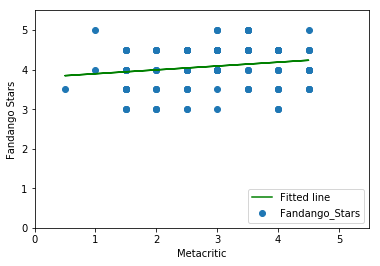

In [61]:
plt.scatter(movies.Metacritic_norm_round,movies.Fandango_Stars)
plt.ylabel("Fandango Stars")
plt.xlabel("Metacritic")
plt.ylim(0,5.5)
plt.xlim(0,5.5)
x=movies.Metacritic_norm_round
y=slope*x+intercept
plt.plot(x,y,label="Fitted line",color="green")
plt.legend(loc=4)
plt.show()